## 랜덤포레스트 승률 모델

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [66]:
# 랜덤포레스트 득점 모델
RUN_ONE =pd.read_csv(r'C:\Users\yuntaeyang\Desktop\svt_code\RUN_END.csv' , encoding = 'ms949' , index_col=0)
RUN_ONE1 = RUN_ONE.iloc[0:4642, :]
RUN_END = RUN_ONE.iloc[4642:4900, :] # 실제 예측해야하는 데이터
RUN_1 = RUN_ONE1.iloc[0:2680, :]
RUN_2 = RUN_ONE1.iloc[2680:2940, :]# test셋
RUN_3 = RUN_ONE1.iloc[2940:4642, :]
df = [RUN_1, RUN_3]
RUN_ONE= pd.concat(df)
RUN_ONE_1 = RUN_ONE.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)

In [67]:
#GRIDSEARCH를 이용한 최적화
X_11 = RUN_ONE_1.iloc[:, :-1]
y_11 = RUN_ONE_1.iloc[:, -1]
X_train11, X_test11, y_train11, y_test11=train_test_split(X_11, y_11,
                                                  test_size=0.2, random_state=0)


params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train11, y_train11)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: 0.0054


In [68]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_run.fit(X_train11, y_train11)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [69]:
# train rmse
rf_run_predict = rf_run.predict(X_train11)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, y_train11))) )

RMSE':3.2530742884060992


In [70]:
# varidation rmse
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__,'####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))
get_model_cv_prediction(rf_run, X_test11, y_test11) 

#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 3.411


In [71]:
# test rmse
RUN_T= RUN_2.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
a11 = RUN_T.iloc[:, :-1]
b11 = RUN_T.iloc[:, -1]
rf_run_predict = rf_run.predict(a11)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, b11))) )

RMSE':3.2919419864744373


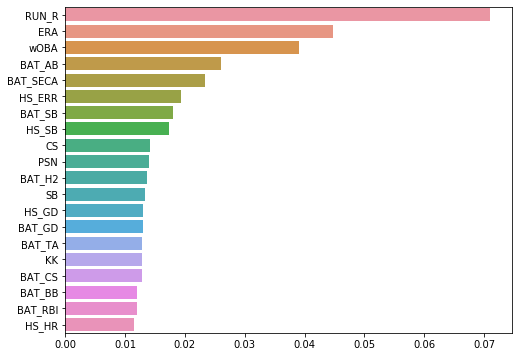

In [72]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train11.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [73]:
# 랜덤포레스트 실점모델
R_ONE =pd.read_csv(r'C:\Users\yuntaeyang\Desktop\svt_code\LOST_END.csv' , encoding = 'ms949' , index_col=0)

R_ONE1 = R_ONE.iloc[0:4642, :]
R_END = R_ONE.iloc[4642:4900, :] # 실제 예측해야하는 데이터
R_1 = R_ONE1.iloc[0:2680, :]
R_2 = R_ONE1.iloc[2680:2940, :]# test셋
R_3 = R_ONE1.iloc[2940:4642, :] 
df = [R_1, R_3]
R_ONE= pd.concat(df)
R_ONE_1 = R_ONE.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_ONE_1

,HEADER_NO,CG_CK,HOLD,INN2,BF,P_PA,P_AB,P_HIT,P_H2,P_H3,...,PRED_WHIP,PRED_SAP,PRED_YANG,M_5,M_6,M_7,M_8,M_9,M_10,R_TARGET
0,0,0.00,0.14,27.14,148.520000,37.980000,35.280000,9.400000,2.020000,0.200000,...,1.621622,-0.350000,1.459459,1,0,0,0,0,0,10.0
1,0,0.00,0.30,25.74,146.460000,38.960000,35.120000,11.500000,2.060000,0.240000,...,1.149701,20.716667,1.131737,1,0,0,0,0,0,4.0
2,0,0.00,0.84,26.86,166.680000,41.920000,33.140000,10.300000,1.520000,0.500000,...,1.329730,6.616667,1.605405,1,0,0,0,0,0,2.0
3,0,0.02,0.06,26.34,169.360000,41.900000,35.860000,11.420000,2.440000,0.000000,...,1.894737,-0.116667,1.105263,1,0,0,0,0,0,9.0
4,0,0.00,0.06,26.16,176.340000,43.900000,35.440000,12.060000,2.360000,0.060000,...,1.386207,11.383333,1.406897,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,0,0.00,0.32,25.56,156.920000,39.810000,33.520000,9.420000,1.460000,0.200000,...,1.311475,12.250000,1.196721,0,0,0,0,1,0,5.0
4638,1,0.00,0.94,26.62,147.180000,39.560000,35.786667,10.126667,1.593333,0.153333,...,0.677778,5.097917,0.609063,0,0,0,0,1,0,3.0
4639,1,0.00,0.08,26.26,153.126667,41.086667,35.666667,11.446667,2.340000,0.213333,...,1.296774,-6.083333,1.703226,0,0,0,0,1,0,7.0
4640,2,0.00,0.94,26.62,147.180000,39.560000,35.786667,10.126667,1.593333,0.153333,...,0.677778,5.097917,0.609063,0,0,0,0,1,0,6.0


In [74]:
#GRIDSEARCH를 이용한 최적화
X_22 = R_ONE_1.iloc[:, :-1]
y_22 = R_ONE_1.iloc[:, -1]
X_train22, X_test22, y_train22, y_test22=train_test_split(X_22, y_22,
                                                  test_size=0.2, random_state=0)


params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 18)
}
rf_r = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_r, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train22, y_train22)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: -0.0002


In [75]:
# 랜덤포레스트 실점모델 학습
rf_r = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=18, min_samples_split=18,n_estimators=200)
rf_r.fit(X_train22, y_train22)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=18,
                      min_samples_split=18, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [76]:
# train rmse
rf_r_predict = rf_r.predict(X_train22)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_r_predict, y_train22))) )

RMSE':3.29346459904915


In [77]:
# varidation rmse
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__,'####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))
get_model_cv_prediction(rf_r, X_test22, y_test22) 

#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 3.285


In [78]:
# test rmse
R_T= R_2.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
a22 = R_T.iloc[:, :-1]
b22 = R_T.iloc[:, -1]
rf_r_predict = rf_r.predict(a22)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_r_predict, b22))) )

RMSE':3.286876035745206


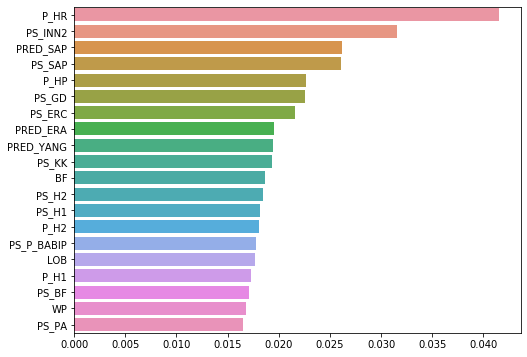

In [79]:
import matplotlib.pyplot as plt # 실점모델 변수 중요도
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_r.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train22.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## XGBOOST 승률 모델

In [80]:
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [81]:
# XGBOOST 득점모델 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

X_11 = RUN_ONE_1.iloc[:, :-1]
y_11 = RUN_ONE_1.iloc[:, -1]
X_train11, X_test11, y_train11, y_test11=train_test_split(X_11, y_11,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train11, label=y_train11)
dtest = xgb.DMatrix(data=X_test11, label=y_test11)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'rmse',
              'objective':'reg:squarederror',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -4.004    |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        | -3.907    |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        | -3.759    |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        | -3.504    |  0.9      |  0.1      |  0.0      |  3.0      |  9.0      |  1.0      |
|  5        | -3.675    |  0.3366   |  0.2309   |  0.09991  |  3.018    |  8.891    |  0.758    |
|  6        | -3.829    |  0.9      |  0.1      |  0.0      |  7.0      |  9.0      |  1.0      |
|  7        | -3.648    |  0.8641   |  0.215    |  0.9241   |  3.002    |  8.996    |  0.9907   |
|  8        | -3.767    |  0.8715   |  0.2931   |  0.005288 |  3.029    |  8.55     |  0.9069   |


[0]	train-rmse:5.45028	eval-rmse:5.38158
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:5.12282	eval-rmse:5.05721
[2]	train-rmse:4.84126	eval-rmse:4.77962
[3]	train-rmse:4.5982	eval-rmse:4.53901
[4]	train-rmse:4.39228	eval-rmse:4.33973
[5]	train-rmse:4.21597	eval-rmse:4.1689
[6]	train-rmse:4.06711	eval-rmse:4.02429
[7]	train-rmse:3.94237	eval-rmse:3.90439
[8]	train-rmse:3.83649	eval-rmse:3.80434
[9]	train-rmse:3.74763	eval-rmse:3.72024
[10]	train-rmse:3.67459	eval-rmse:3.65372
[11]	train-rmse:3.61228	eval-rmse:3.59521
[12]	train-rmse:3.56249	eval-rmse:3.55031
[13]	train-rmse:3.52145	eval-rmse:3.51329
[14]	train-rmse:3.48521	eval-rmse:3.48247
[15]	train-rmse:3.45631	eval-rmse:3.45681
[16]	train-rmse:3.42901	eval-rmse:3.43487
[17]	train-rmse:3.40855	eval-rmse:3.4187
[18]	train-rmse:3.38995	eval-rmse:3.4036
[19]	train-rmse:3.3749	eval-rmse:3.39403
[20]	train-rmse:3.3612	eval-rmse

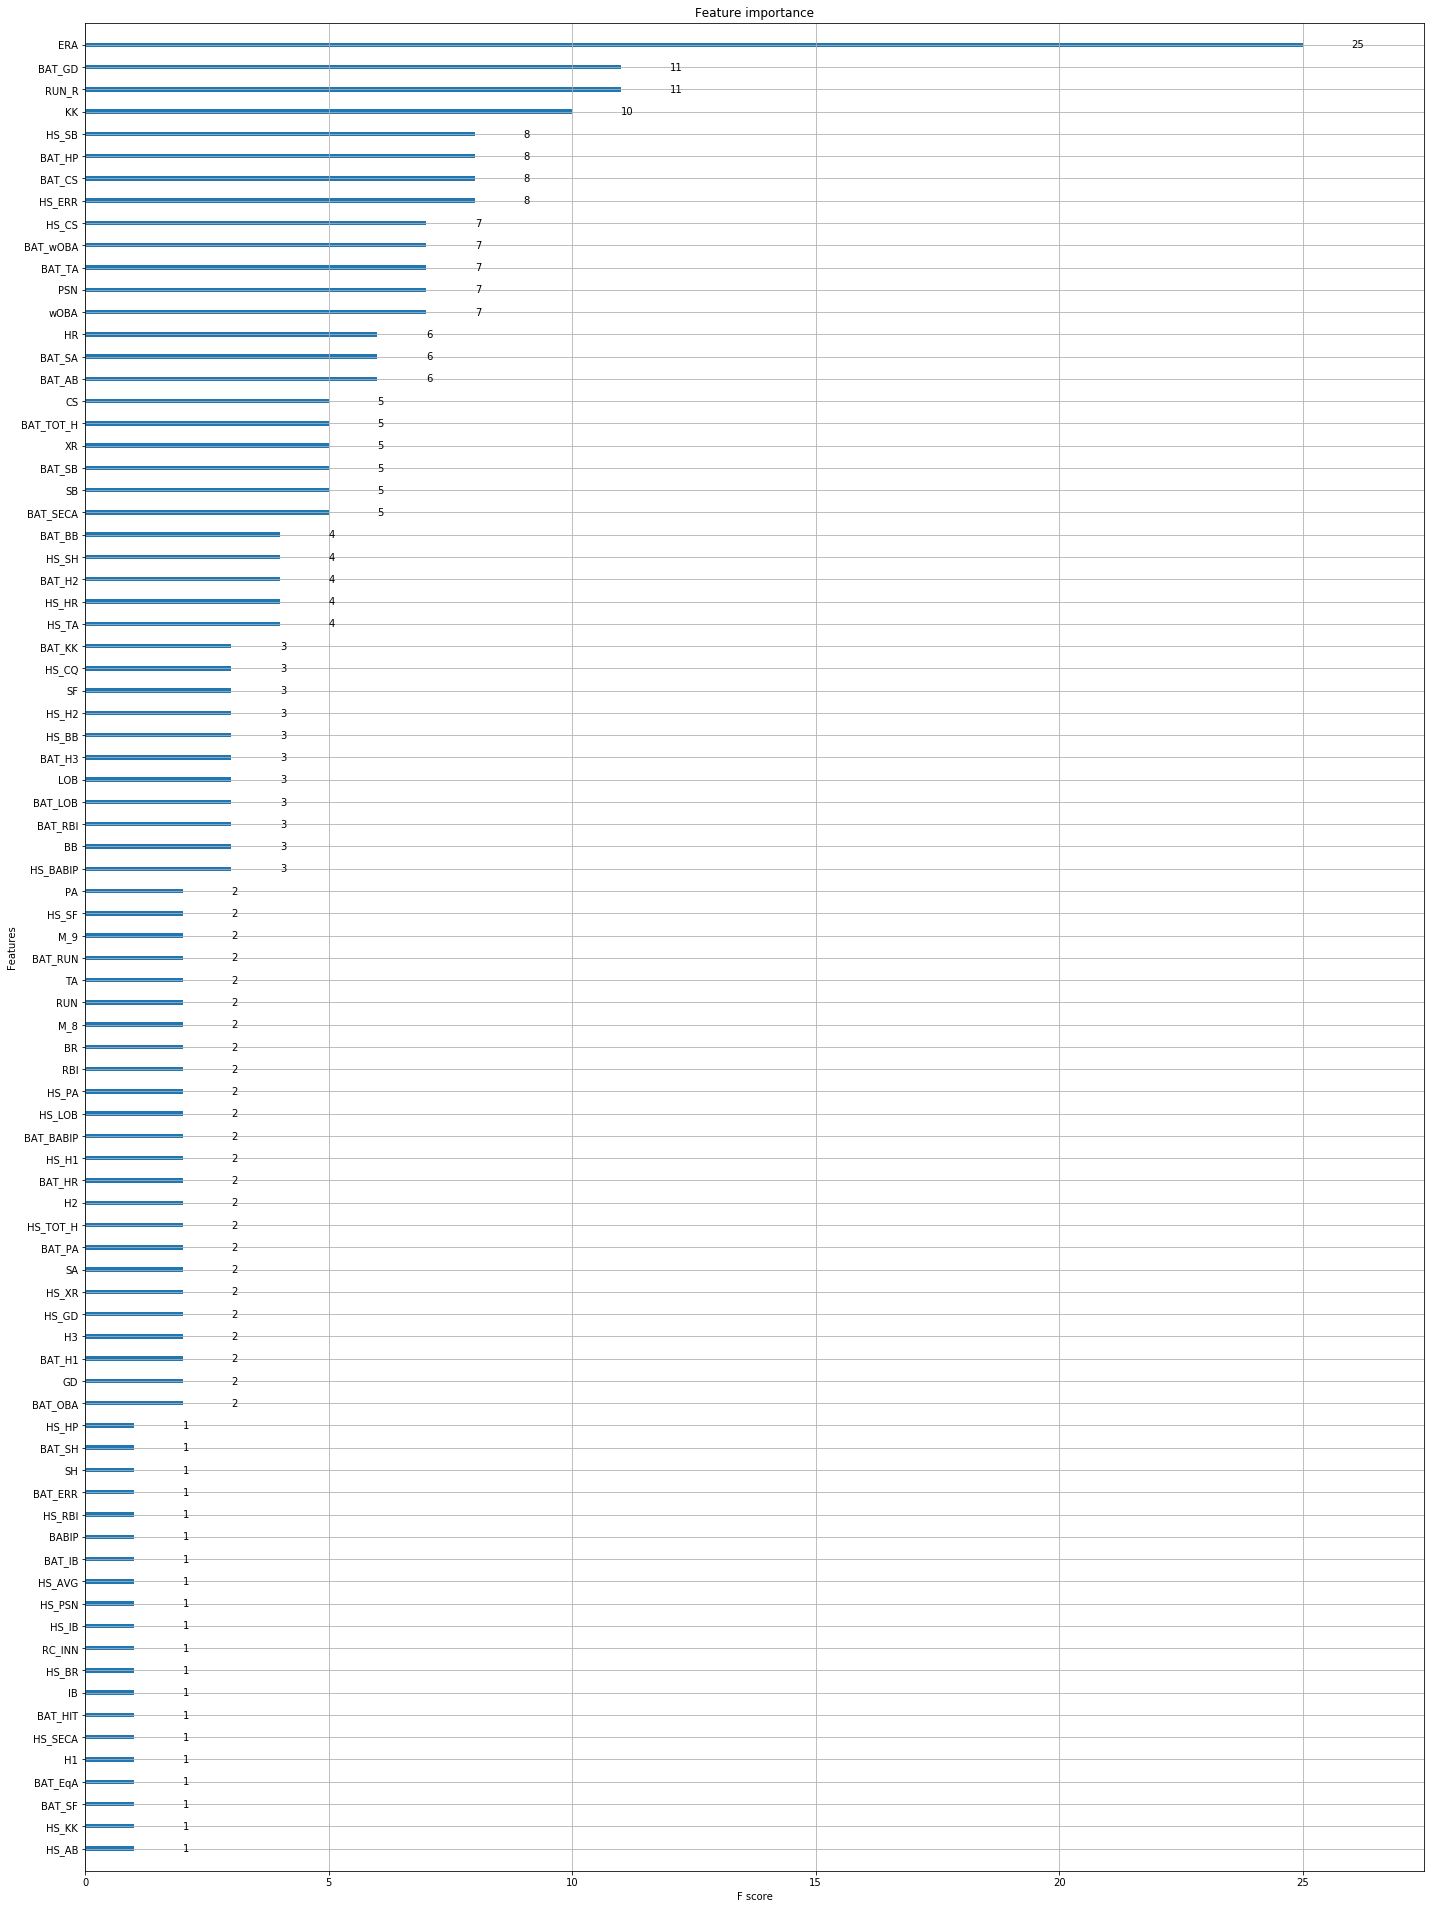

In [82]:
# XGBOOST 득점 모델 학습
X_11 = RUN_ONE_1.iloc[:, :-1]
y_11 = RUN_ONE_1.iloc[:, -1]
X_train11, X_test11, y_train11, y_test11=train_test_split(X_11, y_11,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train11, label=y_train11)
dtest = xgb.DMatrix(data=X_test11, label=y_test11)

params = {
         'max_depth': 3,
         'eta': 0.1,
         'objective':'reg:squarederror',
         'eval_metric': 'rmse',
         'early_stopings':10,
         'gamma': 0,
         'colsample_bytree':0.9,
         'min_child_weight':9,
         'subsample': 1
         }
num_rounds = 500

wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_run =xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)

pred = xgb_run.predict(dtest)



from xgboost import plot_importance # 득점모델의 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_run, ax=ax)

In [83]:
# test rmse
RUN_T= RUN_2.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
a11 = RUN_T.iloc[:, :-1]
b11 = RUN_T.iloc[:, -1]
atest = xgb.DMatrix(data=a11)
xgb_run_predict = xgb_run.predict(atest)
print("RMSE':{}".format(math.sqrt(mean_squared_error(xgb_run_predict, b11))) )

RMSE':3.311085954455768


In [84]:
# XGBOOST 실점 모델 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

X_22 = R_ONE_1.iloc[:, :-1]
y_22 = R_ONE_1.iloc[:, -1]
X_train22, X_test22, y_train22, y_test22=train_test_split(X_22, y_22,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train22, label=y_train22)
dtest = xgb.DMatrix(data=X_test22, label=y_test22)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'rmse',
              'objective':'reg:squarederror',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -3.884    |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        | -3.833    |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        | -3.689    |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        | -3.496    |  0.3      |  0.1      |  1.0      |  3.0      |  5.0      |  0.7      |
|  5        | -3.667    |  0.845    |  0.2523   |  0.9849   |  3.153    |  5.016    |  0.8589   |
|  6        | -3.525    |  0.3058   |  0.1427   |  0.005182 |  3.068    |  8.936    |  0.7185   |
|  7        | -3.5      |  0.3      |  0.1      |  1.0      |  3.0      |  6.797    |  0.7      |
|  8        | -3.493    |  0.3      |  0.1      |  1.0      |  3.0      |  9.0      |  0.7      |


[0]	train-rmse:5.48189	eval-rmse:5.2383
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:5.15464	eval-rmse:4.91497
[2]	train-rmse:4.8717	eval-rmse:4.63225
[3]	train-rmse:4.63136	eval-rmse:4.39285
[4]	train-rmse:4.42499	eval-rmse:4.19142
[5]	train-rmse:4.24889	eval-rmse:4.02027
[6]	train-rmse:4.10046	eval-rmse:3.88235
[7]	train-rmse:3.97315	eval-rmse:3.76169
[8]	train-rmse:3.8646	eval-rmse:3.65948
[9]	train-rmse:3.77725	eval-rmse:3.58333
[10]	train-rmse:3.70353	eval-rmse:3.51697
[11]	train-rmse:3.64288	eval-rmse:3.46647
[12]	train-rmse:3.59286	eval-rmse:3.42398
[13]	train-rmse:3.54897	eval-rmse:3.38959
[14]	train-rmse:3.51468	eval-rmse:3.36148
[15]	train-rmse:3.48612	eval-rmse:3.34205
[16]	train-rmse:3.45833	eval-rmse:3.32372
[17]	train-rmse:3.43526	eval-rmse:3.30834
[18]	train-rmse:3.41629	eval-rmse:3.29503
[19]	train-rmse:3.40048	eval-rmse:3.28718
[20]	train-rmse:3.38671	eval-r

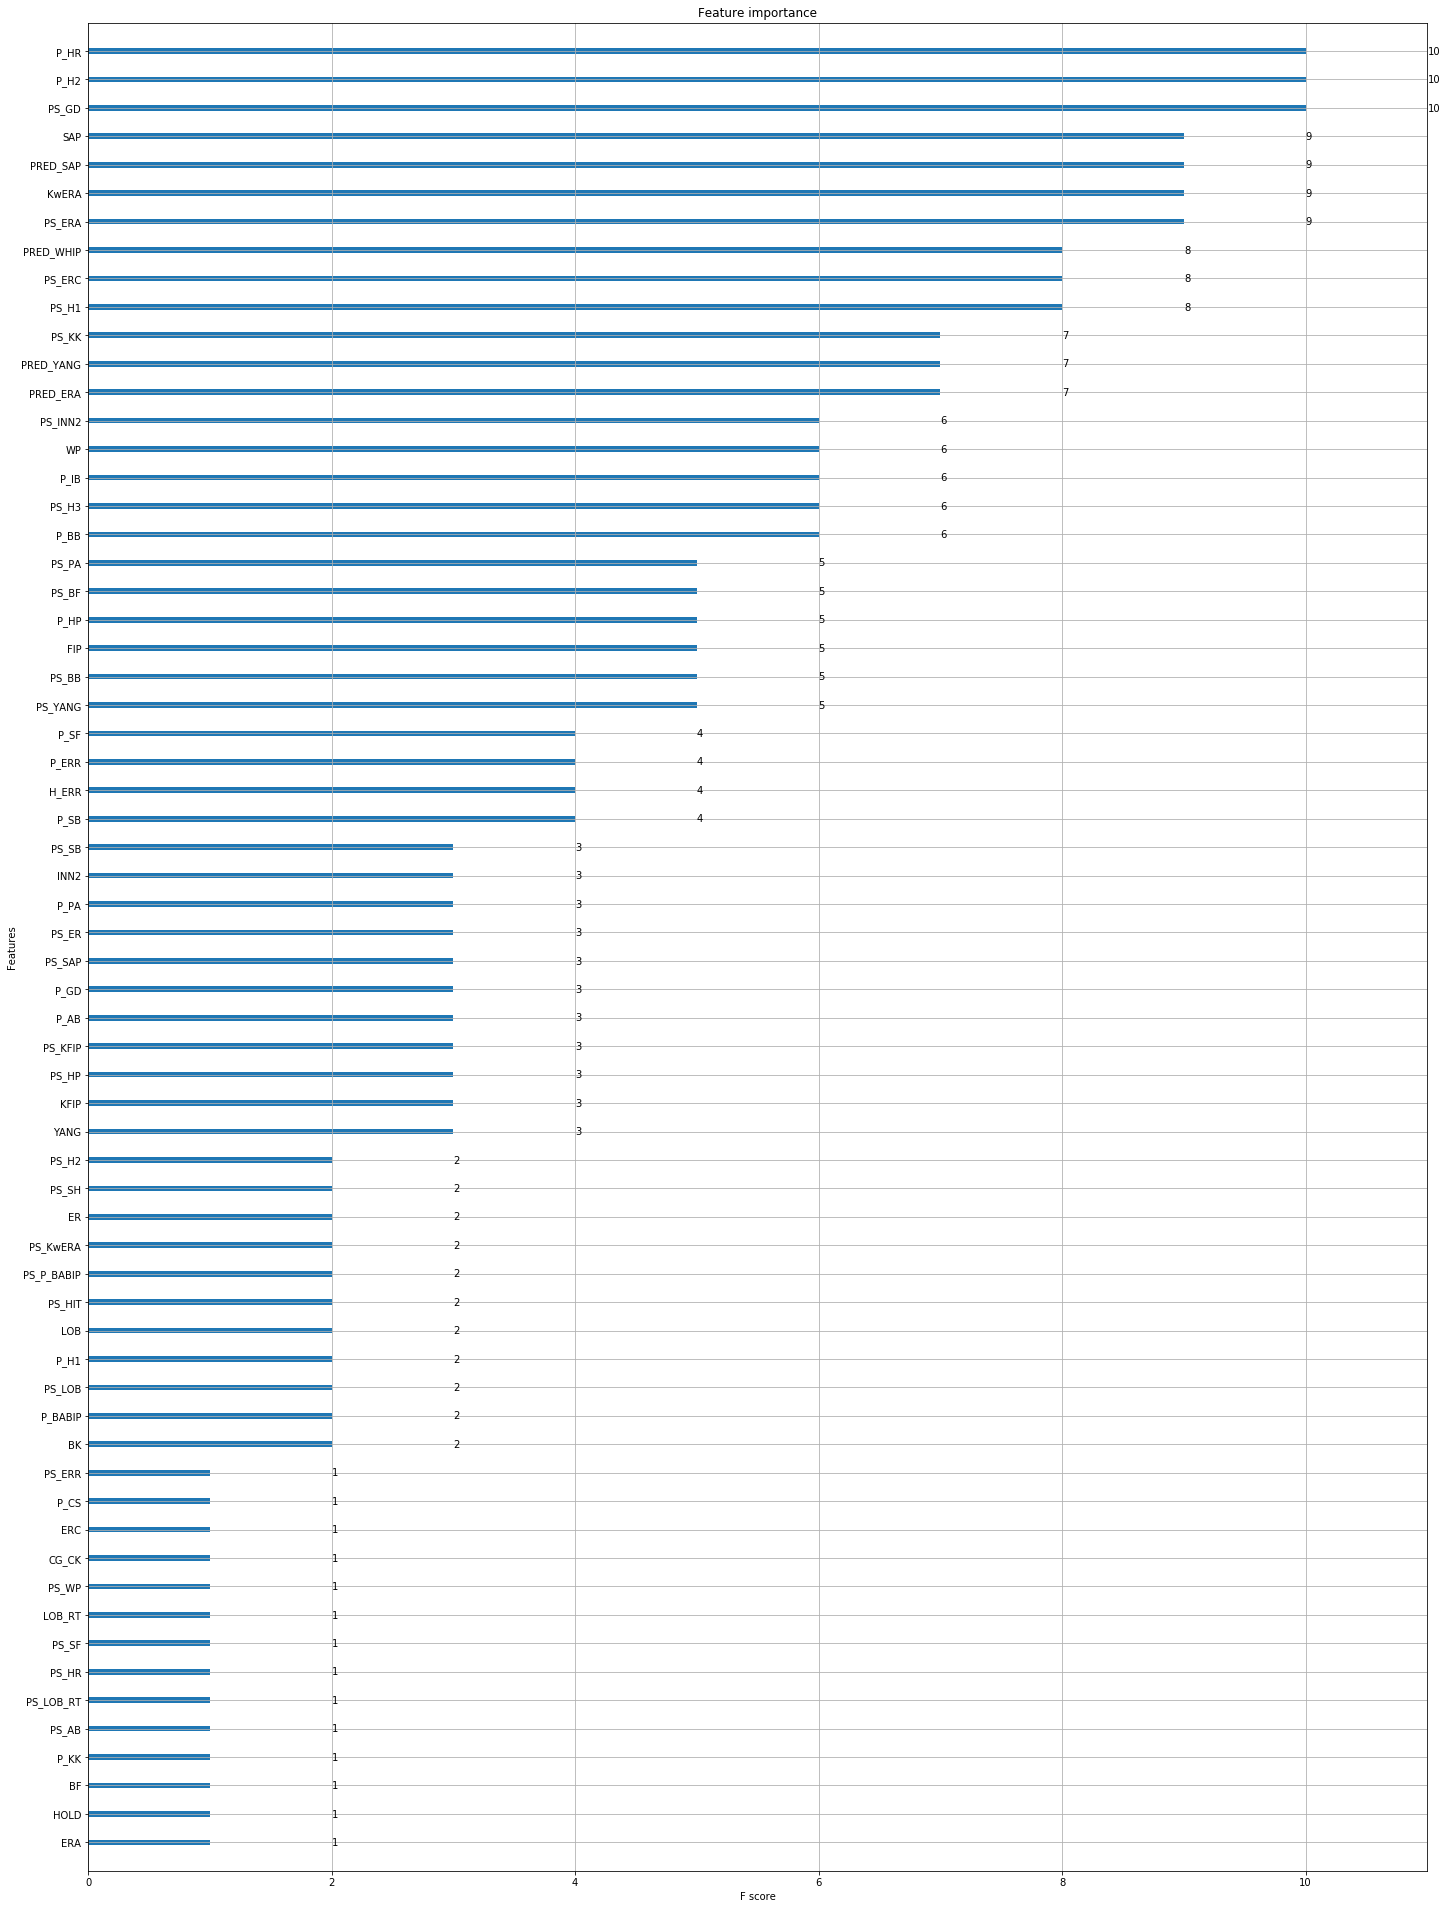

In [85]:
# XGBOOST 실점 모델 학습
X_22 = R_ONE_1.iloc[:, :-1]
y_22 = R_ONE_1.iloc[:, -1]
X_train22, X_test22, y_train22, y_test22=train_test_split(X_22, y_22,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train22, label=y_train22)
dtest = xgb.DMatrix(data=X_test22, label=y_test22)

params = {
         'max_depth': 3,
         'eta': 0.1,
         'objective':'reg:squarederror',
         'eval_metric': 'rmse',
         'early_stopings':10,
         'gamma': 1,
         'colsample_bytree':0.3,
         'min_child_weight': 9,
         'subsample': 0.7
         }
num_rounds = 500

wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_r=xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)

pred = xgb_r.predict(dtest)



from xgboost import plot_importance # 실점모델의 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_r, ax=ax)

In [86]:
# test rmse
R_T= R_2.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
a22 = R_T.iloc[:, :-1]
b22 = R_T.iloc[:, -1]
atest = xgb.DMatrix(data=a22)
xgb_r_predict = xgb_r.predict(atest)
print("RMSE':{}".format(math.sqrt(mean_squared_error(xgb_r_predict, b22))) )

RMSE':3.3021353396829594


## LIGHTGBM

In [87]:
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [88]:
# LIGHTGBM 득점 모델 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):
    X_11 = RUN_ONE_1.iloc[:, :-1]
    y_11 = RUN_ONE_1.iloc[:, -1]
    X_train11, X_test11, y_train11, y_test11=train_test_split(X_11, y_11,
                                                  test_size=0.2, random_state=0)
    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test11, y_test11)]
    model.fit(X_train11, y_train11, eval_metric="rmse", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -3.353    |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -3.348    |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -3.358    |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -3.347    |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -3.354    |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -3.358    |  0.6177   |  0.1127   |  9.961    |  5.503    |  44.65    |  0.8761   |
|  7        | -3.351    |  0.6817   |  0.1134   |  9.982    |  5.025    |  24.25    |  0.9584   |
|  8        | -3.36     |  0.54     |  0.2696   |  9.096    |  5.089    |  32.62    |  0.8133   |
|  9        | -3.347

[1]	valid_0's rmse: 3.36859	valid_0's l2: 11.3474
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 3.36735	valid_0's l2: 11.339
[3]	valid_0's rmse: 3.36743	valid_0's l2: 11.3396
[4]	valid_0's rmse: 3.36669	valid_0's l2: 11.3346
[5]	valid_0's rmse: 3.36552	valid_0's l2: 11.3267
[6]	valid_0's rmse: 3.36554	valid_0's l2: 11.3269
[7]	valid_0's rmse: 3.36542	valid_0's l2: 11.326
[8]	valid_0's rmse: 3.3661	valid_0's l2: 11.3306
[9]	valid_0's rmse: 3.36448	valid_0's l2: 11.3197
[10]	valid_0's rmse: 3.36344	valid_0's l2: 11.3127
[11]	valid_0's rmse: 3.36359	valid_0's l2: 11.3137
[12]	valid_0's rmse: 3.36293	valid_0's l2: 11.3093
[13]	valid_0's rmse: 3.36227	valid_0's l2: 11.3048
[14]	valid_0's rmse: 3.36093	valid_0's l2: 11.2959
[15]	valid_0's rmse: 3.36008	valid_0's l2: 11.2901
[16]	valid_0's rmse: 3.36056	valid_0's l2: 11.2934
[17]	valid_0's rmse: 3.36002	valid_0's l2: 11.2897
[18]	valid_0's rmse: 3.36078	valid_0's l2: 11.2949
[19]	valid_0's rmse: 3.3605	vali

[164]	valid_0's rmse: 3.357	valid_0's l2: 11.2694
[165]	valid_0's rmse: 3.35709	valid_0's l2: 11.27
[166]	valid_0's rmse: 3.35747	valid_0's l2: 11.2726
[167]	valid_0's rmse: 3.35835	valid_0's l2: 11.2785
[168]	valid_0's rmse: 3.35904	valid_0's l2: 11.2831
[169]	valid_0's rmse: 3.35902	valid_0's l2: 11.283
[170]	valid_0's rmse: 3.35935	valid_0's l2: 11.2852
[171]	valid_0's rmse: 3.35962	valid_0's l2: 11.287
[172]	valid_0's rmse: 3.36058	valid_0's l2: 11.2935
[173]	valid_0's rmse: 3.36101	valid_0's l2: 11.2964
[174]	valid_0's rmse: 3.36091	valid_0's l2: 11.2957
[175]	valid_0's rmse: 3.36117	valid_0's l2: 11.2975
[176]	valid_0's rmse: 3.36131	valid_0's l2: 11.2984
[177]	valid_0's rmse: 3.36226	valid_0's l2: 11.3048
[178]	valid_0's rmse: 3.36211	valid_0's l2: 11.3038
[179]	valid_0's rmse: 3.36199	valid_0's l2: 11.303
[180]	valid_0's rmse: 3.36169	valid_0's l2: 11.301
[181]	valid_0's rmse: 3.3616	valid_0's l2: 11.3003
Early stopping, best iteration is:
[81]	valid_0's rmse: 3.34691	valid_0's

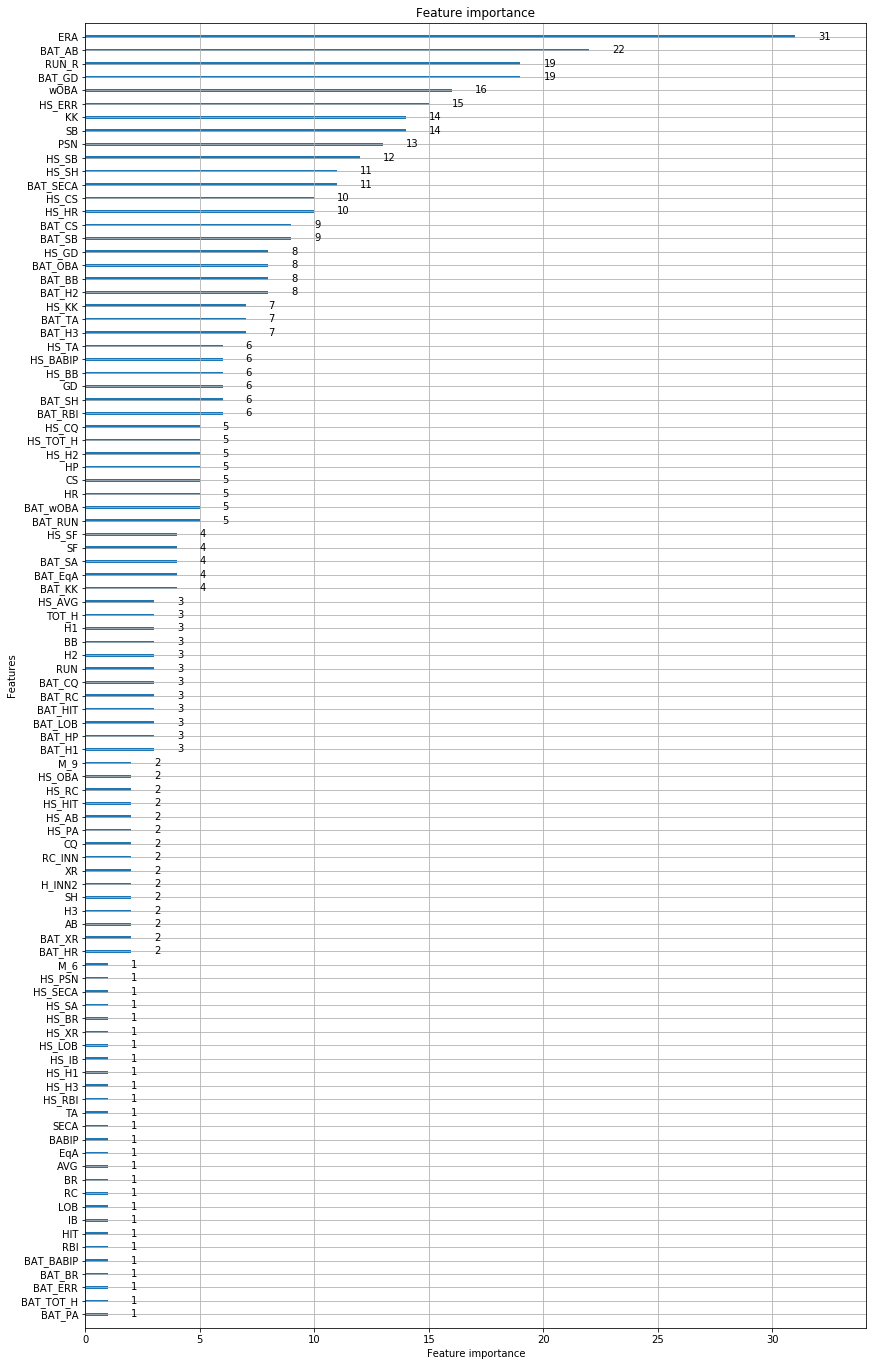

In [89]:
# LIGHTGBM 득점 모델 학습
X_11 = RUN_ONE_1.iloc[:, :-1]
y_11 = RUN_ONE_1.iloc[:, -1]
X_train11, X_test11, y_train11, y_test11=train_test_split(X_11, y_11,
                                                  test_size=0.2, random_state=0)
                        
lgbm_run = LGBMRegressor(n_estimators=300, learning_rate=0.03804, num_leaves=45, sumbsample=0.8049, colsample_bytree=0.5191, max_depth=3,
                             min_child_weight=8.523)
evals = [(X_test11, y_test11)]
lgbm_run.fit(X_train11, y_train11, early_stopping_rounds=100, eval_metric='rmse', eval_set=evals, verbose=True)
preds = lgbm_run.predict(X_test11)

from lightgbm import plot_importance # 득점모델의 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm_run, ax=ax)

In [90]:
# train rmse
lgbm_run_predict = lgbm_run.predict(X_train11)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_run_predict, y_train11))) )

RMSE':3.2947426415479977


In [91]:
# test rmse
RUN_T= RUN_2.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
a11 = RUN_T.iloc[:, :-1]
b11 = RUN_T.iloc[:, -1]
lgbm_run_predict = lgbm_run.predict(a11)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_run_predict, b11))) )

RMSE':3.3089867651381515


In [92]:
# LIGHTGBM 실점 모델 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):
    X_22 = R_ONE_1.iloc[:, :-1]
    y_22 = R_ONE_1.iloc[:, -1]
    X_train22, X_test22, y_train22, y_test22=train_test_split(X_22, y_22,
                                                  test_size=0.2, random_state=0)
    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test22, y_test22)]
    model.fit(X_train22, y_train22, eval_metric="rmse", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5)

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -3.258    |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -3.253    |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -3.259    |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -3.258    |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -3.259    |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -3.26     |  0.7118   |  0.1124   |  9.801    |  5.005    |  44.32    |  0.8695   |
|  7        | -3.261    |  0.5499   |  0.1356   |  9.379    |  8.5      |  24.1     |  0.9449   |
|  8        | -3.256    |  0.8689   |  0.1024   |  3.038    |  8.899    |  44.81    |  0.846    |
|  9        | -3.26 

[1]	valid_0's rmse: 3.26085	valid_0's l2: 10.6332
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 3.25851	valid_0's l2: 10.6179
[3]	valid_0's rmse: 3.26102	valid_0's l2: 10.6343
[4]	valid_0's rmse: 3.26311	valid_0's l2: 10.6479
[5]	valid_0's rmse: 3.26379	valid_0's l2: 10.6523
[6]	valid_0's rmse: 3.2678	valid_0's l2: 10.6785
[7]	valid_0's rmse: 3.26876	valid_0's l2: 10.6848
[8]	valid_0's rmse: 3.26961	valid_0's l2: 10.6903
[9]	valid_0's rmse: 3.27576	valid_0's l2: 10.7306
[10]	valid_0's rmse: 3.27391	valid_0's l2: 10.7185
[11]	valid_0's rmse: 3.27756	valid_0's l2: 10.7424
[12]	valid_0's rmse: 3.28272	valid_0's l2: 10.7762
[13]	valid_0's rmse: 3.28249	valid_0's l2: 10.7747
[14]	valid_0's rmse: 3.28526	valid_0's l2: 10.7929
[15]	valid_0's rmse: 3.286	valid_0's l2: 10.7978
[16]	valid_0's rmse: 3.28619	valid_0's l2: 10.7991
[17]	valid_0's rmse: 3.28849	valid_0's l2: 10.8142
[18]	valid_0's rmse: 3.28661	valid_0's l2: 10.8018
[19]	valid_0's rmse: 3.28734	val

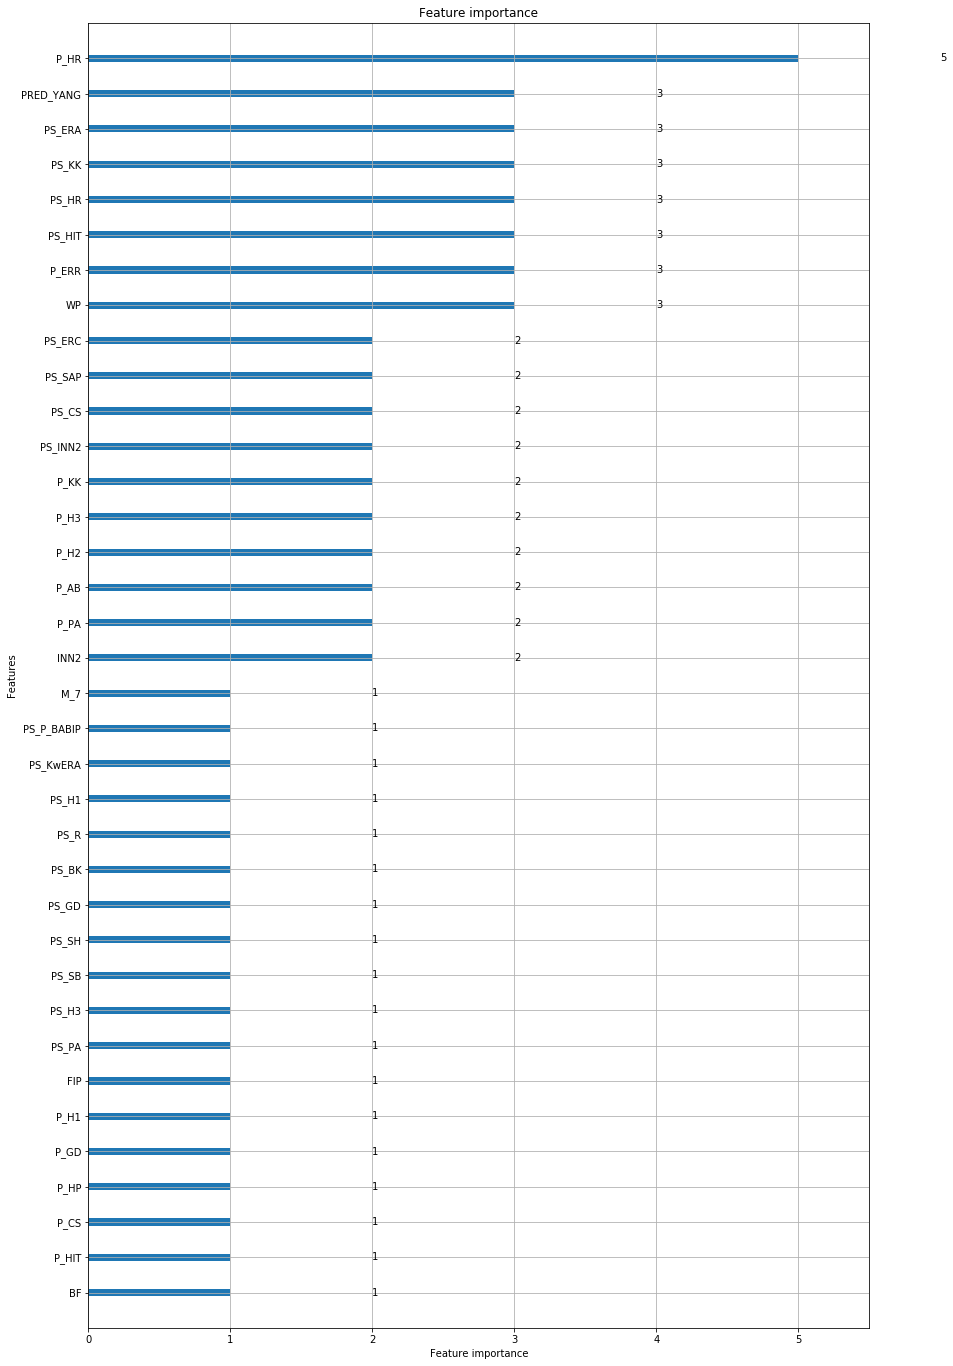

In [93]:
# LIGHTGBM 실점 모델 학습
X_22 = R_ONE_1.iloc[:, :-1]
y_22 = R_ONE_1.iloc[:, -1]
X_train22, X_test22, y_train22, y_test22=train_test_split(X_22, y_22,
                                                  test_size=0.2, random_state=0)
                        
lgbm_r = LGBMRegressor(n_estimators=300, learning_rate=0.1102, num_leaves=33, sumbsample=0.937, colsample_bytree=0.5931, max_depth=6,
                             min_child_weight=7.155)
evals = [(X_test22, y_test22)]
lgbm_r.fit(X_train22, y_train22, early_stopping_rounds=100, eval_metric='rmse', eval_set=evals, verbose=True)
preds = lgbm_r.predict(X_test22)

from lightgbm import plot_importance # 실점모델의 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm_r, ax=ax)

In [94]:
# train rmse
lgbm_r_predict = lgbm_r.predict(X_train22)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_r_predict, y_train22))) )

RMSE':3.3907652872743204


In [95]:
# test rmse
R_T= R_2.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
a22 = R_T.iloc[:, :-1]
b22 = R_T.iloc[:, -1]
lgbm_r_predict = lgbm_r.predict(a22)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_r_predict, b22))) )

RMSE':3.295124626497405


## MLP 승률모델

In [96]:
#  MLP 득점 모델
X_11 = RUN_ONE_1.iloc[:,:-1]
y_11 = RUN_ONE_1.iloc[:,-1]

In [97]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_11)
RUN_ONE_scaled = scaler.transform(X_11)

RUN_scaled = pd.DataFrame(data=RUN_ONE_scaled)

In [98]:
# MLP 득점모델 생성
from keras import models
from keras import layers



mlp_run = models.Sequential()
mlp_run.add(layers.Dense(109, activation='relu',
                          input_shape=(RUN_scaled.shape[1],)))
mlp_run.add(layers.Dropout(0.5))
mlp_run.add(layers.BatchNormalization())
mlp_run.add(layers.Dense(109, activation='relu'))
mlp_run.add(layers.Dropout(0.5))
mlp_run.add(layers.BatchNormalization())
mlp_run.add(layers.Dense(109, activation='relu'))
mlp_run.add(layers.Dense(1))

In [99]:
# MLP 득점모델 학습
import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.3, beta_2=0.999, epsilon=1e-07)
mlp_run.compile(optimizer=opt,
             loss='mean_squared_error', metrics=['mean_squared_error'])

In [100]:
import warnings
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

X_train11, X_test11, y_train11, y_test11=train_test_split(RUN_scaled, y_11,
                                                 test_size=0.2, random_state=1)
        
early_stop = keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=10)
EPOCHS=100
        
history = mlp_run.fit(X_train11, y_train11,
          epochs=EPOCHS,validation_data = (X_test11, y_test11), verbose=0, callbacks= early_stop, batch_size=20)

In [101]:
# 조기종료후 마지막 구간 평가지표 확인

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
18,11.670921,11.670921,11.679288,11.679288,18
19,11.657017,11.657017,11.749428,11.749428,19
20,11.635144,11.635144,11.779669,11.779669,20
21,11.617944,11.617944,12.300481,12.300481,21
22,11.694150,11.694150,12.178942,12.178942,22


In [102]:
# 다른 모델들과 성능비교를 위해 RMSE로 전환
# train rmse
math.sqrt(11.735756)

3.425748969203669

In [103]:
# validation mse
math.sqrt(12.281877)

3.5045508984747245

In [104]:
# test RMSE
RUN_T = RUN_2.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
a_11 = RUN_T.iloc[:, :-1]
b_11 = RUN_T.iloc[:, -1]
scaler = StandardScaler()
scaler.fit(X_11)
RUN_2_scaled = scaler.transform(a_11)

RUN2_scaled = pd.DataFrame(data=RUN_2_scaled)
mlp_run_predict = mlp_run.predict(RUN2_scaled)
print("RMSE':{}".format(math.sqrt(mean_squared_error(mlp_run_predict, b_11))) )

RMSE':3.2547806243704307


In [105]:
# MLP 실점 모델
X_22 = R_ONE_1.iloc[:,:-1]
y_22 = R_ONE_1.iloc[:,-1]

In [106]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_22)
R_scaled = scaler.transform(X_22)

R2_scaled = pd.DataFrame(data=R_scaled)

In [107]:
# MLP 실점 모델 생성 
from keras import models
from keras import layers

mlp_r = models.Sequential()
mlp_r.add(layers.Dense(85, activation='relu',
                          input_shape=(R2_scaled.shape[1],)))
mlp_r.add(layers.Dropout(0.5))
mlp_r.add(layers.BatchNormalization())
mlp_r.add(layers.Dense(60, activation='relu'))
mlp_r.add(layers.Dropout(0.5))
mlp_r.add(layers.BatchNormalization())
mlp_r.add(layers.Dense(60, activation='relu'))
mlp_r.add(layers.Dense(1))

In [108]:
# MLP 실점 모델 학습
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.3, beta_2=0.999, epsilon=1e-07)
mlp_r.compile(optimizer=opt,
             loss='mean_squared_error', metrics=['mean_squared_error'])

In [109]:
import warnings
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

X_train22, X_test22, y_train22, y_test22=train_test_split(R2_scaled, y_22,
                                                 test_size=0.2, random_state=1)
        
early_stop = keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=10)
EPOCHS=100
        
history = mlp_r.fit(X_train22, y_train22,
          epochs=EPOCHS,validation_data = (X_test22, y_test22), verbose=0, callbacks= early_stop, batch_size=20)

In [110]:
# 조기종료후 마지막 구간 평가지표 확인
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
22,11.876273,11.876273,11.483407,11.483407,22
23,11.810299,11.810299,11.293047,11.293047,23
24,11.872410,11.872410,11.507493,11.507493,24
25,11.789574,11.789574,11.556508,11.556508,25
26,11.787349,11.787349,11.354736,11.354736,26


In [111]:
# 다른 모델들과 성능비교를 위해 RMSE로 전환
# train rmse
math.sqrt(12.133721)

3.483349106822341

In [112]:
# varidation rmse
math.sqrt(11.023909)

3.320227251258564

In [113]:
# test RMSE
R_T = R_2.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
a_22 = R_T.iloc[:, :-1]
b_22 = R_T.iloc[:, -1]
scaler = StandardScaler()
scaler.fit(X_22)
R_2_scaled = scaler.transform(a_22)

R2_scaled = pd.DataFrame(data=R_2_scaled)
mlp_r_predict = mlp_r.predict(R2_scaled)
print("RMSE':{}".format(math.sqrt(mean_squared_error(mlp_r_predict, b_22))) )

RMSE':3.3237684109751555


## 최종 모델 LIGHTGBM으로 테스트

In [114]:
RUN_NC = RUN_2[RUN_2['T_ID']== 'NC']
RUN_OB = RUN_2[RUN_2['T_ID']== 'OB']
RUN_LG = RUN_2[RUN_2['T_ID']== 'LG']
RUN_WO = RUN_2[RUN_2['T_ID']== 'WO']
RUN_HH = RUN_2[RUN_2['T_ID']== 'HH']
RUN_HT = RUN_2[RUN_2['T_ID']== 'HT']
RUN_KT = RUN_2[RUN_2['T_ID']== 'KT']
RUN_LT = RUN_2[RUN_2['T_ID']== 'LT']
RUN_SK = RUN_2[RUN_2['T_ID']== 'SK']
RUN_SS = RUN_2[RUN_2['T_ID']== 'SS']
RUN_HH = RUN_HH.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
RUN_OB = RUN_OB.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
RUN_LG = RUN_LG.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
RUN_WO = RUN_WO.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
RUN_NC = RUN_NC.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
RUN_HT = RUN_HT.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
RUN_KT = RUN_KT.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
RUN_LT = RUN_LT.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
RUN_SK = RUN_SK.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)
RUN_SS = RUN_SS.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','AB_TARGET'], axis =1)

# test셋 팀별 득점를 보기 위한 분할

In [115]:
R_NC = R_2[R_2['T_ID']== 'NC']
R_OB = R_2[R_2['T_ID']== 'OB']
R_LG = R_2[R_2['T_ID']== 'LG']
R_WO = R_2[R_2['T_ID']== 'WO']
R_HH = R_2[R_2['T_ID']== 'HH']
R_HT = R_2[R_2['T_ID']== 'HT']
R_KT = R_2[R_2['T_ID']== 'KT']
R_LT = R_2[R_2['T_ID']== 'LT']
R_SK = R_2[R_2['T_ID']== 'SK']
R_SS = R_2[R_2['T_ID']== 'SS']
R_HH = R_HH.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_OB = R_OB.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_LG = R_LG.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_WO = R_WO.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_NC = R_NC.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_HT = R_HT.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_KT = R_KT.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_LT = R_LT.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_SK = R_SK.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
R_SS = R_SS.drop(['ER_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)

# test셋 팀별 실점를 보기 위한 분할

In [116]:
def lgbm_run_r111(A,B,C):
    a_test = A.iloc[:, :-1]
    b_test = A.iloc[:, -1]
    pred = lgbm_run.predict(a_test)
    
    nam =['col']
    y = pd.DataFrame(pred, columns=nam)
    y_11sum = y['col'].sum()
    y_11sum # 예측 득점 합
    
    a_test1 = B.iloc[:, :-1]
    b_test1 = B.iloc[:, -1]
    preds = lgbm_r.predict(a_test1)
    nam =['col']
    y1 = pd.DataFrame(preds, columns=nam)
    y_22sum = y1['col'].sum()
    y_22sum # 예측 실점 합
    y_ssum = (y_11sum **2) + (y_22sum **2)
    predict_rr = (y_11sum ** 2) / (y_ssum) # 예측 승률
    
    predict_rrr = predict_rr + C
        
    return print('예측 승률:', predict_rrr)

In [117]:
lgbm_run_r111(RUN_SK,R_SK,0.1)
lgbm_run_r111(RUN_OB,R_OB,0.1)
lgbm_run_r111(RUN_KT,R_KT,-0.1)
lgbm_run_r111(RUN_HH,R_HH,0)
lgbm_run_r111(RUN_LG,R_LG,0)
lgbm_run_r111(RUN_WO,R_WO,0)
lgbm_run_r111(RUN_NC,R_NC,-0.1)
lgbm_run_r111(RUN_HT,R_HT,0)
lgbm_run_r111(RUN_LT,R_LT,0)
lgbm_run_r111(RUN_SS,R_SS,0)

예측 승률: 0.6000082336735928
예측 승률: 0.6142596593879637
예측 승률: 0.4024540343253711
예측 승률: 0.5075455723078581
예측 승률: 0.5069416708483176
예측 승률: 0.4916232566477001
예측 승률: 0.3936736674983472
예측 승률: 0.5336992098099367
예측 승률: 0.5088662998620468
예측 승률: 0.5166711086292781


In [118]:
# 실제 승률 구하기
RUN1_2=RUN_2[['G_ID','T_ID','RUN_TARGET']]
R1_2=R_2[['G_ID','T_ID', 'R_TARGET']]
RUN_R1_2 = pd.merge(RUN1_2 , R1_2 , on=['G_ID', 'T_ID'], how ='left')

In [119]:
# 무승부 경기를 제거한 경기 추출 , 승패 구분하는 변수 생성
RUN_R1_2['RUN_R'] = RUN_R1_2['RUN_TARGET'] - RUN_R1_2['R_TARGET']
q1=[(RUN_R1_2['RUN_R']> 0),
    (RUN_R1_2['RUN_R']< 0),
   (RUN_R1_2['RUN_R'] == 0)]
   
choicelist =[1,0,2]
RUN_R1_2['TARGET']=np.select(q1, choicelist)
R1_ = RUN_R1_2[RUN_R1_2['TARGET']== 1 ]
R1__ = RUN_R1_2[RUN_R1_2['TARGET']== 0]
df =[R1_, R1__]
RUN11_2 = pd.concat(df)

In [120]:
# 팀별 실제 승률을 확인하기 위해 분할
R1_NC = RUN11_2[RUN11_2['T_ID']== 'NC']
R1_OB = RUN11_2[RUN11_2['T_ID']== 'OB']
R1_LG = RUN11_2[RUN11_2['T_ID']== 'LG']
R1_WO = RUN11_2[RUN11_2['T_ID']== 'WO']
R1_HH = RUN11_2[RUN11_2['T_ID']== 'HH']
R1_HT = RUN11_2[RUN11_2['T_ID']== 'HT']
R1_KT = RUN11_2[RUN11_2['T_ID']== 'KT']
R1_LT = RUN11_2[RUN11_2['T_ID']== 'LT']
R1_SK = RUN11_2[RUN11_2['T_ID']== 'SK']
R1_SS = RUN11_2[RUN11_2['T_ID']== 'SS']

# 테스트 셋 팀별 경기수 확인 함수
def shape(A):
    a = np.array(A)
    return a.shape

In [121]:
# 테스트 셋 팀별 경기수 확인
print(shape(R1_SK))
print(shape(R1_OB))
print(shape(R1_KT))
print(shape(R1_HH))
print(shape(R1_LG))
print(shape(R1_WO))
print(shape(R1_NC))
print(shape(R1_HT))
print(shape(R1_LT))
print(shape(R1_SS))

(28, 6)
(27, 6)
(26, 6)
(25, 6)
(23, 6)
(22, 6)
(24, 6)
(30, 6)
(30, 6)
(23, 6)


In [122]:
# 실제승률 구하는 함수
def rate(A,B):
    y = A['TARGET'].sum()
    y1 = y / B
    return y1

In [123]:
#실제 승률 
print(rate(R1_SK, 28))
print(rate(R1_OB, 27))
print(rate(R1_KT, 26))
print(rate(R1_HH, 25))
print(rate(R1_LG, 23))
print(rate(R1_WO, 22))
print(rate(R1_NC, 24))
print(rate(R1_HT, 30))
print(rate(R1_LT, 30))
print(rate(R1_SS, 23))

0.5
0.6296296296296297
0.38461538461538464
0.48
0.391304347826087
0.5909090909090909
0.4166666666666667
0.5333333333333333
0.5333333333333333
0.5217391304347826


In [124]:
# 실제 승률과 예측 승률 비교 
A2 = [0.6003741473628448,0.6194181844426323,0.3963138475701078,0.5033389102397815,0.5006776805904696,0.489304224244128,0.3882023509989766,0.5240739697808687,0.5116379598859976,0.5142309457882362]
B2 = [0.5,0.6296296296296297,0.38461538461538464,0.48,0.391304347826087,0.5909090909090909,0.4166666666666667,0.5333333333333333,0.5333333333333333,0.5217391304347826]

print("RMSE':{}".format(math.sqrt(mean_squared_error(A2, B2))) )

RMSE':0.05879616640039946


## 승률 최종예측

In [125]:
RUN_END_NC = RUN_END[RUN_END['T_ID']== 'NC']
RUN_END_OB = RUN_END[RUN_END['T_ID']== 'OB']
RUN_END_LG = RUN_END[RUN_END['T_ID']== 'LG']
RUN_END_WO = RUN_END[RUN_END['T_ID']== 'WO']
RUN_END_HH = RUN_END[RUN_END['T_ID']== 'HH']
RUN_END_HT = RUN_END[RUN_END['T_ID']== 'HT']
RUN_END_KT = RUN_END[RUN_END['T_ID']== 'KT']
RUN_END_LT = RUN_END[RUN_END['T_ID']== 'LT']
RUN_END_SK = RUN_END[RUN_END['T_ID']== 'SK']
RUN_END_SS = RUN_END[RUN_END['T_ID']== 'SS']
RUN_END_NC= RUN_END_NC.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_OB= RUN_END_OB.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_LG= RUN_END_LG.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_WO= RUN_END_WO.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_HH= RUN_END_HH.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_HT= RUN_END_HT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_KT= RUN_END_KT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_LT= RUN_END_LT.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_SK= RUN_END_SK.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)
RUN_END_SS= RUN_END_SS.drop(['RUN_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS','HIT_TARGET'], axis =1)

In [126]:
R_END_NC = R_END[R_END['T_ID']== 'NC']
R_END_OB = R_END[R_END['T_ID']== 'OB']
R_END_LG = R_END[R_END['T_ID']== 'LG']
R_END_WO = R_END[R_END['T_ID']== 'WO']
R_END_HH = R_END[R_END['T_ID']== 'HH']
R_END_HT = R_END[R_END['T_ID']== 'HT']
R_END_KT = R_END[R_END['T_ID']== 'KT']
R_END_LT = R_END[R_END['T_ID']== 'LT']
R_END_SK = R_END[R_END['T_ID']== 'SK']
R_END_SS = R_END[R_END['T_ID']== 'SS']
R_END_NC= R_END_NC.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_OB= R_END_OB.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_LG= R_END_LG.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_WO= R_END_WO.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_HH= R_END_HH.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_HT= R_END_HT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_KT= R_END_KT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_LT= R_END_LT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_SK= R_END_SK.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_SS= R_END_SS.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)

In [127]:
def lgbm_run_r1(A,B,C):
    a_test = A
    pred = lgbm_run.predict(a_test)
    
    nam =['col']
    y = pd.DataFrame(pred, columns=nam)
    y_11sum = y['col'].sum()
    y_11sum # 예측 득점 합
    
    a_test1 = B
    preds = lgbm_r.predict(a_test1)
    nam =['col']
    y1 = pd.DataFrame(preds, columns=nam)
    y_22sum = y1['col'].sum()
    y_22sum # 예측 실점 합
    y_ssum = (y_11sum **2) + (y_22sum **2)
    predict_rr = (y_11sum ** 2) / (y_ssum) # 예측 승률
    
    predict_rrr = predict_rr + C
        
    return print('예측 승률:', predict_rrr)

In [128]:
lgbm_run_r1(RUN_END_SK,R_END_SK,-0.1)
lgbm_run_r1(RUN_END_OB,R_END_OB,0)
lgbm_run_r1(RUN_END_KT,R_END_KT,0)
lgbm_run_r1(RUN_END_HH,R_END_HH,-0.1)
lgbm_run_r1(RUN_END_LG,R_END_LG,0)
lgbm_run_r1(RUN_END_WO,R_END_WO,0.1)
lgbm_run_r1(RUN_END_NC,R_END_NC,0.1)
lgbm_run_r1(RUN_END_HT,R_END_HT,0)
lgbm_run_r1(RUN_END_LT,R_END_LT,0)
lgbm_run_r1(RUN_END_SS,R_END_SS,0)

예측 승률: 0.39809424205836086
예측 승률: 0.5048984019246976
예측 승률: 0.49996048380384206
예측 승률: 0.38758412964844824
예측 승률: 0.44184348386319233
예측 승률: 0.56556345457583
예측 승률: 0.5906546043960358
예측 승률: 0.4858003564016109
예측 승률: 0.5069026249740372
예측 승률: 0.500835826431402
